In [1]:
import sys
# sys.path.append('/mnt/c/Users/wayne/tvb/tvbtools/')
sys.path.append('/mnt/w/github/tvbtools/')
from tvbtools.signaltools import SignalToolkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
import os

In [2]:
node_names = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMp-R','mTEMp-L','mTEMp-R']
fs = 81920.0
samplinginterval = 1/fs
t = np.arange(0, 1, samplinginterval)
grps = ['SNC','NC','MCI','AD']
col = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
path = '/mnt/w/Gc_Go.xlsx'
# path = '/mnt/c/Users/Wayne/tvb/stat_data/Gc_Go.xlsx'
coData = pd.read_excel(path)

def read_data(grp, caseid, amp='p2v'):
    #gm = np.round(coData.loc[caseid, "Gc"], 3)
    # filename = '/mnt/d/data/LFP/'+str(grp)+'/'+str(caseid)+'/'+str(caseid)+'_'+str(gm)+'.csv'
    filename = '/mnt/w/gc3mins/'+grp+'/'+caseid+'.h5'
    subject = SignalToolkit(filename, 81920.)
    df = subject.data_reader()

    cutoff_low = 2.
    cutoff_high = 10.
    spikesparas = {'prominence': 0.5, 'height': .5}
    valleysparas= {'prominence': 0.2, 'width':2000, 'height': -0.5}
    spikesparas_af= {'prominence': 0.2, 'width':2000, 'height': 0.}
    valleysparas_af = {'prominence': 0.2, 'width':2000, 'height': -0.5}

    pcgl=subject.signal_package(data=df, channel_num = 4, label='pcg_left', low=cutoff_low, high=cutoff_high, spikesparas=spikesparas, valleysparas=valleysparas, spikesparas_af=spikesparas_af, valleysparas_af = valleysparas, truncate=10.)
    pcgr=subject.signal_package(data=df, channel_num = 5, label='pcg_right', low=cutoff_low, high=cutoff_high, spikesparas=spikesparas, valleysparas=valleysparas, spikesparas_af=spikesparas_af, valleysparas_af=valleysparas_af, truncate=10.)

    fig = plt.figure(figsize=(15,5))
    axes = fig.add_subplot(111)
    axes.set_title(f"{grp}_{caseid}")
    subject.signal_af(**pcgl, axes=axes)
    subject.signal_af(**pcgr, axes=axes)
    plt.legend()
    plt.show()

    # freq
    pcgl_freq_gamma = subject.freq_count(pcgl["spikeslist"])
    pcgr_freq_gamma = subject.freq_count(pcgr["spikeslist"])
    pcgl_freq_theta = subject.freq_count(pcgl["spikeslist_af"])
    pcgr_freq_theta = subject.freq_count(pcgr["spikeslist_af"])

    # amp
    if amp in ['p2v']:
        pcgl_amp_gamma = subject.amp_count(**pcgl, mode="p2v")
        pcgr_amp_gamma = subject.amp_count(**pcgr, mode="p2v")
        pcgl_amp_theta = subject.amp_count(data=pcgl["after_filtered"], spikeslist=pcgl["spikeslist_af"], valleyslist=pcgl["valleyslist_af"], mode="p2v")
        pcgr_amp_theta = subject.amp_count(data=pcgr["after_filtered"], spikeslist=pcgr["spikeslist_af"], valleyslist=pcgr["valleyslist_af"], mode="p2v")
    elif amp in ['ap']:
        # another version of amp
        pcgl_amp_gamma, pcgl_amp_theta = subject.amp_count(**pcgl, mode="ap")
        pcgr_amp_gamma, pcgr_amp_theta = subject.amp_count(**pcgr, mode="ap")


    # delay
    pcg_delay = subject.phase_delay(pcgl["after_filtered"], pcgr["after_filtered"], pcgl["spikeslist_af"], pcgl["valleyslist_af"], pcgr["spikeslist_af"], pcgr["valleyslist_af"], mode = "SI")

    res_dict = {"group":grp, 
    "caseid":caseid, 
    "pcgl_freq_gamma":pcgl_freq_gamma,
    "pcgr_freq_gamma":pcgr_freq_gamma,
    "pcgl_freq_theta":pcgl_freq_theta,
    "pcgr_freq_theta":pcgr_freq_theta,
    "pcgl_amp_gamma":pcgl_amp_gamma,
    "pcgr_amp_gamma":pcgr_amp_gamma,
    "pcgl_amp_theta":pcgl_amp_theta,
    "pcgr_amp_theta":pcgr_amp_theta,
    "pcg_delay":pcg_delay}
    return res_dict

    # fig = plt.figure(figsize=(15,5))
    # axes = fig.add_subplot(111)
    # for i in range(16):
    #     _, power = subject.psd(df[:,i], sampling_interval = 1/fs, visual=True, xlim=100., axes=axes, label=f"{node_names[i]}")
    #     if i == 4:
    #         highest_pcg_left = np.argmax(power)
    #     if i == 5:
    #         highest_pcg_right = np.argmax(power)
    # axes.set_title(f"{grp}_{caseid}")
    # plt.savefig(f"/mnt/c/Users/wayne/tvb/psdres/{grp}_{caseid}.png", dpi=300)
    # return highest_pcg_left, highest_pcg_right

/home/wayne/miniconda3/envs/tvbenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


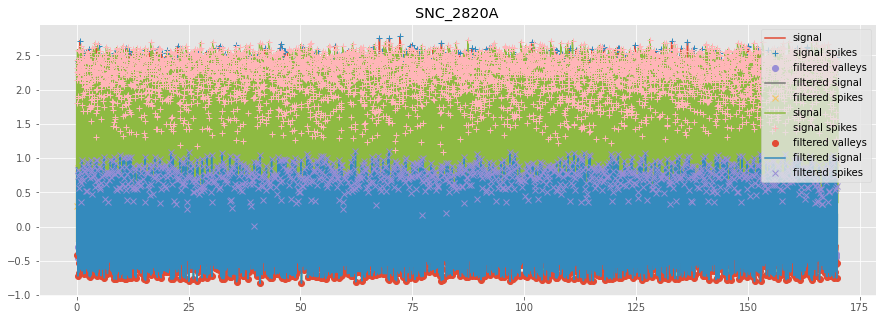

{'group': 'SNC', 'caseid': '2820A', 'pcgl_freq_gamma': 1307, 'pcgr_freq_gamma': 5306, 'pcgl_freq_theta': 912, 'pcgr_freq_theta': 1184, 'pcgl_amp_gamma': 2.715305638980969, 'pcgr_amp_gamma': 2.7872167352074513, 'pcgl_amp_theta': 1.1261868490287164, 'pcgr_amp_theta': 1.334379219627149, 'pcg_delay': -19.895496034255796}


/home/wayne/miniconda3/envs/tvbenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


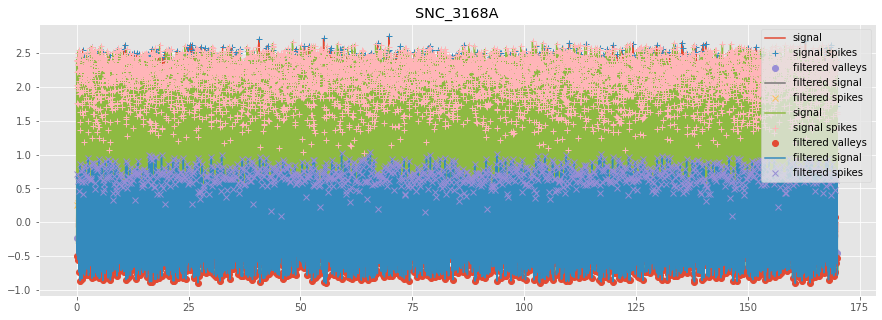

{'group': 'SNC', 'caseid': '3168A', 'pcgl_freq_gamma': 651, 'pcgr_freq_gamma': 6598, 'pcgl_freq_theta': 798, 'pcgr_freq_theta': 1182, 'pcgl_amp_gamma': 2.549099350492042, 'pcgr_amp_gamma': 2.723785218691914, 'pcgl_amp_theta': 0.9452340157296614, 'pcgr_amp_theta': 1.321383889403142, 'pcg_delay': 27.5791263130972}


In [3]:
#%matplotlib widget
# print(coData)
# read_data('NC', "0591A")
# df = pd.DataFrame(columns=["group", "caseid", "pcg_left_power", "pcg_right_power"])
for grp, caseid in zip(coData.groups, coData.caseid):
    print(read_data(grp, caseid))
#     df = pd.concat([df, pd.DataFrame.from_records([{"group": grp, "caseid":caseid,"pcg_left_power":pcgl, "pcg_right_power": pcgr}])], ignore_index = True)
# df.to_excel('/mnt/c/Users/wayne/tvb/psd_data.xlsx')